In [2]:

import gym
import matplotlib.pyplot as plt
import numpy as np
from gym import wrappers
import pickle

pos_space = np.linspace(-1.2, 0.6, 12)
vel_space = np.linspace(-0.07, 0.07, 20)

def get_state(observation):
    pos, vel =  observation
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))

    return (pos_bin, vel_bin)

def max_action(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)

    return action


In [3]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
n_games = 10000
alpha = 0.1
gamma = 0.99
eps = 1.0

action_space = [0, 1, 2]

states = []
for pos in range(21):
    for vel in range(21):
        states.append((pos, vel))

Q = {}
for state in states:
    for action in action_space:
        Q[state, action] = 0


score = 0
total_rewards = np.zeros(n_games)
for i in range(n_games):
    done = False
    obs = env.reset()
    state = get_state(obs)
    if i % 100 == 0 and i > 0:
        print('episode ', i, 'score ', score, 'epsilon %.3f' % eps)
    score = 0
    while not done:
        action = np.random.choice([0,1,2]) if np.random.random() < eps else max_action(Q, state)
        obs_, reward, done, info = env.step(action)
        state_ = get_state(obs_)
        score += reward
        action_ = max_action(Q, state_)
        Q[state, action] = Q[state, action] + alpha*(reward + gamma*Q[state_, action_] - Q[state, action])
        state = state_
    total_rewards[i] = score
    eps = eps - 2/n_games if eps > 0.01 else 0.01



episode  100 score  -1000.0 epsilon 0.980
episode  200 score  -1000.0 epsilon 0.960
episode  300 score  -1000.0 epsilon 0.940
episode  400 score  -1000.0 epsilon 0.920
episode  500 score  -1000.0 epsilon 0.900
episode  600 score  -1000.0 epsilon 0.880
episode  700 score  -1000.0 epsilon 0.860
episode  800 score  -1000.0 epsilon 0.840
episode  900 score  -1000.0 epsilon 0.820
episode  1000 score  -855.0 epsilon 0.800
episode  1100 score  -1000.0 epsilon 0.780
episode  1200 score  -1000.0 epsilon 0.760
episode  1300 score  -570.0 epsilon 0.740
episode  1400 score  -608.0 epsilon 0.720
episode  1500 score  -697.0 epsilon 0.700
episode  1600 score  -702.0 epsilon 0.680
episode  1700 score  -647.0 epsilon 0.660
episode  1800 score  -853.0 epsilon 0.640
episode  1900 score  -347.0 epsilon 0.620
episode  2000 score  -531.0 epsilon 0.600
episode  2100 score  -403.0 epsilon 0.580
episode  2200 score  -431.0 epsilon 0.560
episode  2300 score  -391.0 epsilon 0.540
episode  2400 score  -388.0 epsi

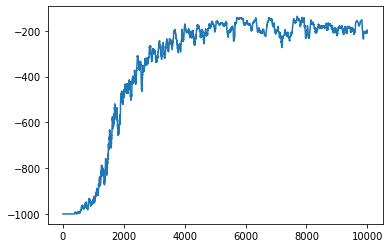

In [4]:
mean_rewards = np.zeros(n_games)
for t in range(n_games):
    mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
plt.plot(mean_rewards)